<a href="https://colab.research.google.com/github/quangdad/DataMining/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header=None, names=['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology'])

data.head(10)



,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Sex             155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

<Axes: >

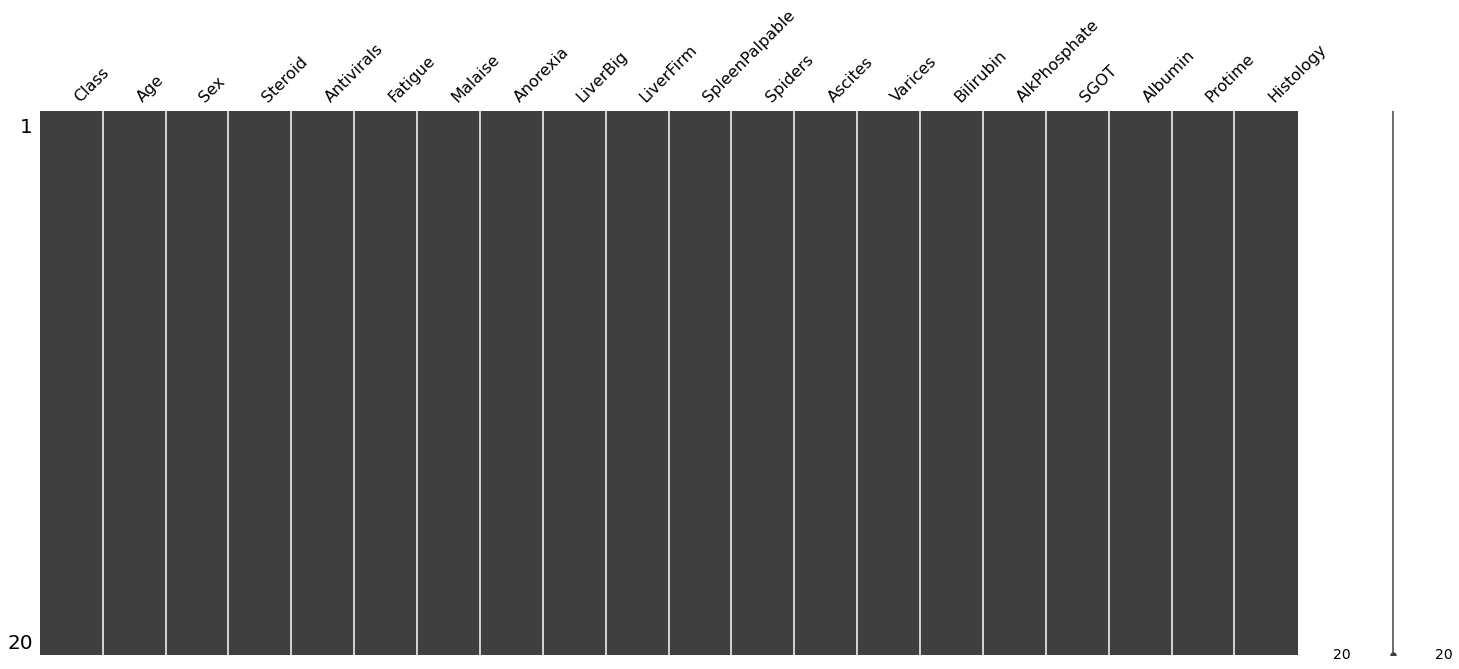

In [ ]:
msno.matrix(data.head(20))

In [46]:
data = data.replace('?', np.nan).dropna()

data.head(10)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
15,2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.00,72,89,2.9,46,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.70,53,42,4.1,85,2
19,2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1
20,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.90,48,20,4.2,64,1


In [47]:
# Thêm thuộc tính mới 'LiverQuality' - Chất lượng gan
def liver_quality(row):
    if float(row['Bilirubin']) > 1.2 and float(row['Albumin']) < 3.5:
        return 0 # Kém
    else:
        return 1 # Tốt
data['LiverQuality'] = data.apply(liver_quality, axis=1)


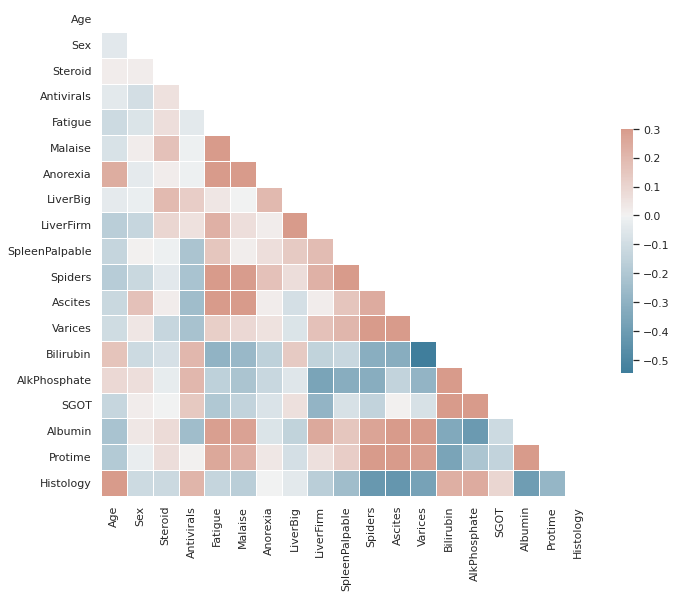

In [ ]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Chuẩn hóa dữ liệu các thuộc tính số
numeric_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vẽ biểu đồ tương quan giữa các thuộc tính
sns.set(style="white")
corr = data.drop('Class', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [48]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(['Class', 'LiverQuality'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest và huấn luyện trên tập huấn luyện
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Dự đoán độ chính xác mô hình trên tập huấn luyện và tập kiểm tra

y_test_pred = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test set accuracy: {accuracy_test:.4f}')

Test set accuracy: 0.9375


In [51]:
# Load and preprocess test data
test_data = pd.read_csv('patients.csv', header=None)
test_data.columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
                     'Anorexia','LiverBig', 'LiverFirm', 'SpleenPalpable', 
                     'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 
                     'SGOT', 'Albumin', 'Protime', 'Histology']
test_data.head(10)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,34,2,2,2,1,1,1,1,1,2,1,2,2,0.7,70,24,4.1,100,2
1,50,1,2,2,1,2,2,2,1,1,2,1,1,2.8,155,75,2.4,32,2
2,54,1,1,2,1,1,2,2,2,2,2,1,2,1.2,85,92,3.1,66,2
3,57,1,1,2,1,1,2,2,2,2,1,1,2,4.6,82,55,3.3,30,2
4,54,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,30,4.5,0,2
5,72,1,2,1,1,2,2,2,1,2,2,2,2,1.0,115,52,3.4,50,2
6,38,1,1,2,2,2,2,2,1,2,2,2,2,0.4,243,49,3.8,90,2
7,25,1,2,2,1,2,2,1,1,1,1,1,1,1.3,181,181,4.5,57,2
8,38,1,2,2,2,2,2,2,1,2,1,2,1,1.6,130,140,3.5,56,2
9,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2


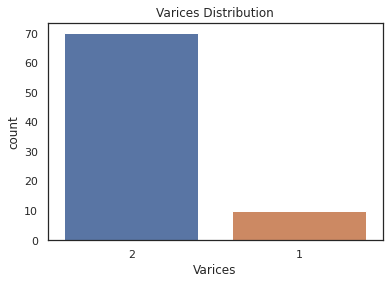

In [ ]:
sns.countplot(x='Varices', data=data)
plt.title('Varices Distribution')
plt.show()


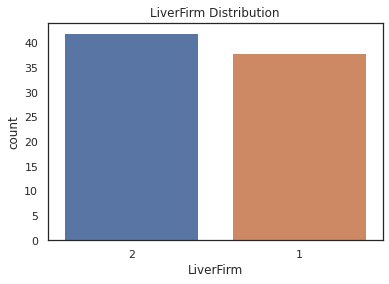

In [ ]:
sns.countplot(x='LiverFirm', data=data)
plt.title('LiverFirm Distribution')
plt.show()


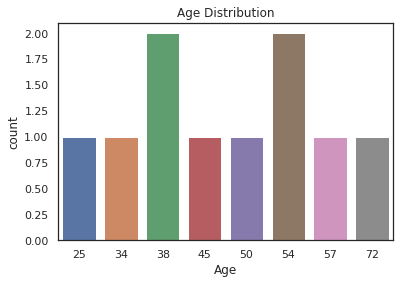

In [52]:
sns.countplot(x='Age', data=test_data)
plt.title('Age Distribution')
plt.show()


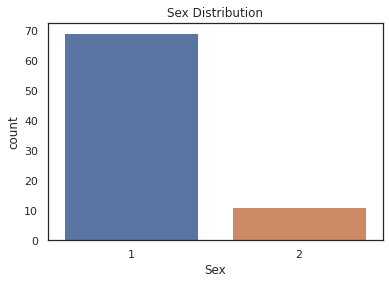

In [ ]:
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')
plt.show()

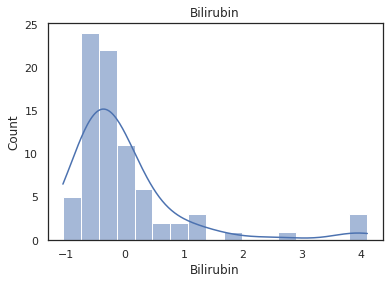

In [ ]:
sns.histplot(x='Bilirubin', data=data, kde=True)
plt.title('Bilirubin')
plt.show()

In [53]:
# Thêm thuộc tính mới 'LiverQuality' - Chất lượng gan

test_data['LiverQuality'] = test_data.apply(liver_quality, axis=1)
test_data['Class'] = rf_model.predict(test_data.drop('LiverQuality', axis=1))

In [54]:
#In các mẫu dữ liệu và kết quả dự đoán tương ứng
print('Kết quả chuẩn đoán cho các bệnh nhân(Decisison tree):')
for i in range(len(test_data)):
  sample = test_data.iloc[[i]]
  prediction = sample['Class'].values[0]
  liver_quality = 'tốt' if sample['LiverQuality'].values[0] == 1 else 'kém'
  if prediction == 1:
    print(f'Mẫu {i+1}: Bệnh nhân không bị nhiễm virus viêm gan B, gan {liver_quality}')
  else:
    print(f'Mẫu {i+1}: Bệnh nhân bị nhiễm virus viêm gan B')

Kết quả chuẩn đoán cho các bệnh nhân(Decisison tree):
Mẫu 1: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 2: Bệnh nhân không bị nhiễm virus viêm gan B, gan kém
Mẫu 3: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 4: Bệnh nhân không bị nhiễm virus viêm gan B, gan kém
Mẫu 5: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 6: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 7: Bệnh nhân không bị nhiễm virus viêm gan B, gan tốt
Mẫu 8: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 9: Bệnh nhân bị nhiễm virus viêm gan B
Mẫu 10: Bệnh nhân bị nhiễm virus viêm gan B
